In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')
import os
import curvedsky as cs
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2
from quest import Reconstruction
from plotstat import recStat,crazymix

In [3]:
rec_fg2 = Reconstruction.from_ini('LB_FG2.ini')

DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded


In [21]:
arr = rec_fg2.get_qcl_wR_stat()

In [23]:
arr.shape

(400, 30)

In [26]:
arrn = np.delete(arr, 0, axis=0)

In [28]:
arrn.shape

(399, 30)

In [40]:
arr = crazymix(rec_fg2,rec_fg2,0,do_MC=False,use_off_diag=False).get_samples(False).reshape(-1)
print(np.mean(arr),np.std(arr))

../plotstat.py:125: RuntimeWarning: invalid value encountered in true_divide
  cl = (self.get_data() -
../plotstat.py:128: RuntimeWarning: invalid value encountered in true_divide
  


1.0463676110732694 0.01951154148539407


In [41]:
Alens = []
for i in tqdm(range(400),desc='Alens',unit='sim'):
    Alens.append(np.mean(crazymix(rec_fg2,rec_fg2,i).get_samples(False).reshape(-1)))
Alens = np.array(Alens)

Alens:   0%|          | 0/400 [00:00<?, ?sim/s]

../plotstat.py:125: RuntimeWarning: invalid value encountered in true_divide
  cl = (self.get_data() -
../plotstat.py:128: RuntimeWarning: invalid value encountered in true_divide
  
Alens: 100%|██████████| 400/400 [24:23<00:00,  3.66s/sim]


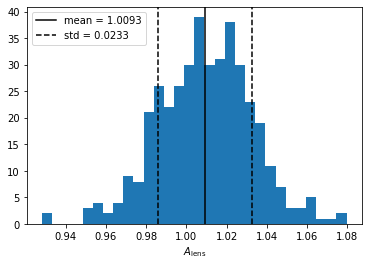

In [42]:
null = plt.hist(Alens,bins=30)
plt.axvline(np.mean(Alens),color='k',label=f"mean = {np.mean(Alens):.4f}")
plt.axvline(np.mean(Alens)+np.std(Alens),color='k',ls='--',label=f"std = {np.std(Alens):.4f}")
plt.axvline(np.mean(Alens)-np.std(Alens),color='k',ls='--')
plt.xlabel(r'$A_{\rm lens}$')
plt.legend()


In [44]:
0.0093/0.0233

0.3991416309012875

In [16]:
np.std(Alens)

0.0002653633513261502

5.0